<a href="https://colab.research.google.com/github/Archana-Tharammal/TSF_Internship-Data-Science-and-Business-Analytics/blob/main/Task1_TSF_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Supervised ML** -Archana T

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [29]:
url ="http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Visualising the data**

<function matplotlib.pyplot.show(close=None, block=None)>

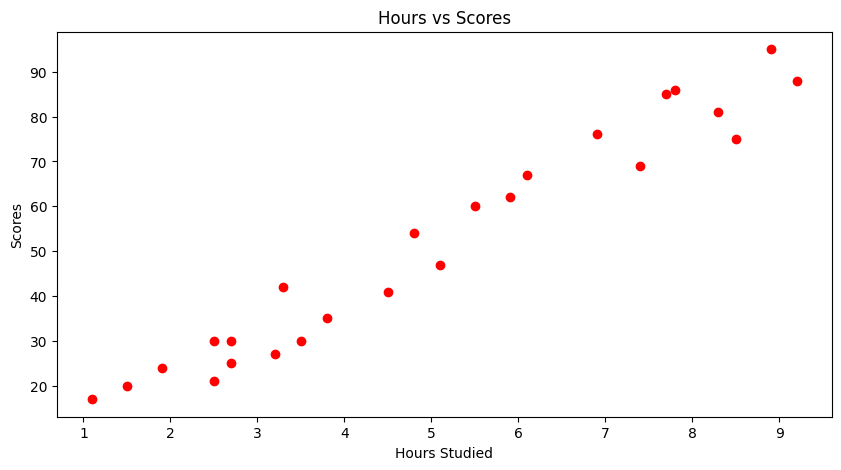

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(data['Hours'], data['Scores'],color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show

Prepare the data for training

In [33]:
X=data[['Hours']].values
Y=data[['Scores']].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Training

In [35]:
regressor= LinearRegression()
regressor.fit(X_train, Y_train)
print("Training Complete.")

Training Complete.


Make predictions

In [36]:
print(X_test)
Y_pred= regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Plot actual vs predicted

<function matplotlib.pyplot.show(close=None, block=None)>

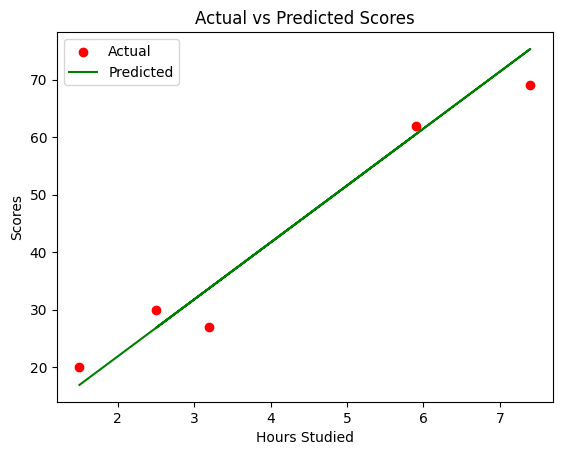

In [37]:
plt.scatter(X_test, Y_test,color='red', label='Actual')
plt.plot(X_test, Y_pred,color='green', label='Predicted')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show

In [38]:
Y_test_flatten =Y_test.flatten()
Y_pred_flatten =Y_pred.flatten()
df = pd.DataFrame({'Actual': Y_test_flatten, 'Predicted': Y_pred_flatten})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Predicted score if a student studies for 9.25/day?

In [39]:
hours =9.25
reshape= np.array(hours).reshape(1,-1)
pred= regressor.predict(reshape)
print('Number of hours ={}'.format(hours))
print('Predicted Score ={}'.format(pred[0]))

Number of hours =9.25
Predicted Score =[93.69173249]


Evaluating the model

In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
